In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from model.simulator import RunSingleTactic
from model.config_classes import SingleConfig

In [3]:
config = SingleConfig(
    10, None, None, 1, 1, 0, 0, 
    primary_inoculum=dict(
        RR=1e-7,
        RS=1e-4,
        SR=1e-4,
        SS=1-1e-4-1e-4-1e-7,
    )
)

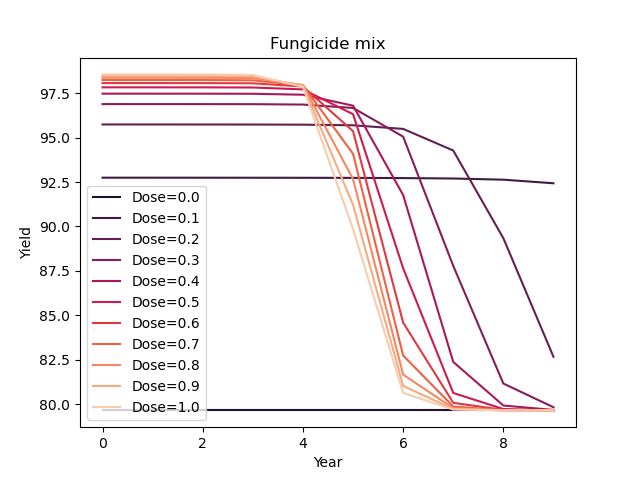

In [28]:
f, ax = plt.subplots()

sns.set_palette('rocket', n_colors=11)

sim = RunSingleTactic(None)

sim.yield_stopper = 0

for ii in np.linspace(0,1,11):
    
    config = SingleConfig(
        10, None, None,
        ii, ii,
        ii, ii, 
        primary_inoculum=dict(
            RR=1e-7,
            RS=1e-4,
            SR=1e-4,
            SS=1-1e-4-1e-4-1e-7,
        )
    )
    
    config.load_saved = False
    
    data = sim.run(config)
    yld = data.yield_vec

    ax.plot(yld, label=f'Dose={ii:.1f}')


ax.set_xlabel('Year')
ax.set_ylabel('Yield')

# ax.set_title('Single fungicide')
ax.set_title('Fungicide mix')

ax.legend()

In [29]:
f.savefig('../outputs/figures/rough/yld_mix.jpg')

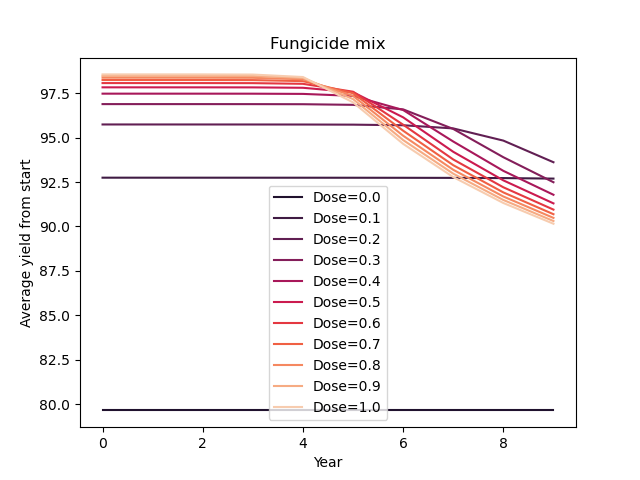

In [30]:
f, ax = plt.subplots()

sns.set_palette('rocket', n_colors=11)

sim = RunSingleTactic(None)

sim.yield_stopper = 0

for ii in np.linspace(0,1,11):
    
    config = SingleConfig(
        10, None, None, 
        ii, ii,
        # 0, 0, 
        ii, ii,
        primary_inoculum=dict(
            RR=1e-7,
            RS=1e-4,
            SR=1e-4,
            SS=1-1e-4-1e-4-1e-7,
        )
    )
    
    config.load_saved = False
    
    data = sim.run(config)
    yld = data.yield_vec
    
    av_yld = np.cumsum(yld) / np.arange(1,11)

    ax.plot(av_yld, label=f'Dose={ii:.1f}')

    
ax.set_xlabel('Year')
ax.set_ylabel('Average yield from start')

# ax.set_title('Single fungicide')
ax.set_title('Fungicide mix')

ax.legend()

In [31]:
# f.savefig('../outputs/figures/rough/av_yld.jpg')
f.savefig('../outputs/figures/rough/av_yld_mix.jpg')